# Assignment 13

Dataset: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
- Do visulization  and analysis to understand the dataset ( follow kaggle code for inspiration)
- Apply Random Forest
- Plot AUC-ROC curve*

### Steps:
1. Look others code. Notedown beautiful code.(1 hr)
2. Perform EDA(3 hr)
    - Data Quality Check and Validation
    - Data analysis
    - Data visualization
3. Perform FE(1 hr)
4. Apply model (1 hr)
5. Plot AUC-ROC curve(1 hr)

Total estimated time: 7 hr.

__Objects:__

    This project will predict what types of drug one need based on their feature like: 'age','gender', 'BP' etc.

In [73]:
# importing necessary module

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [74]:
df = pd.read_csv('./data/drug200.csv')

In [75]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [76]:
df.shape

(200, 6)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Columns are in correct format for analysis.

In [78]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No missing value.

In [79]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [80]:
df.drop_duplicates()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


No duplicate value

### EDA

### Age

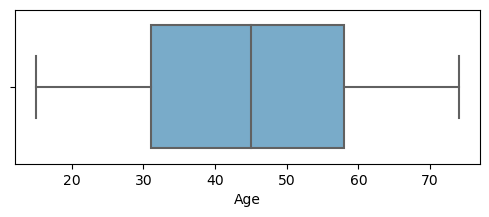

In [81]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Age'], palette='Blues_r')
plt.show()

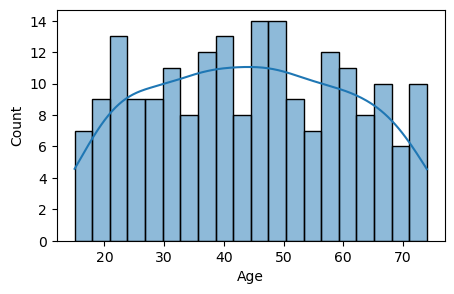

In [82]:
plt.figure(figsize=(5,3))
sns.histplot(x=df['Age'], bins=20,kde=True)
plt.show()

### Na_to_K

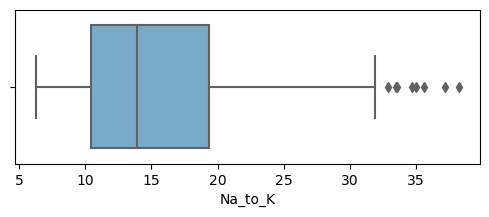

In [83]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Na_to_K'], palette='Blues_r')
plt.show()

Some outliers appear in plot. But they are close and dataset is relatively small. So we can keep those


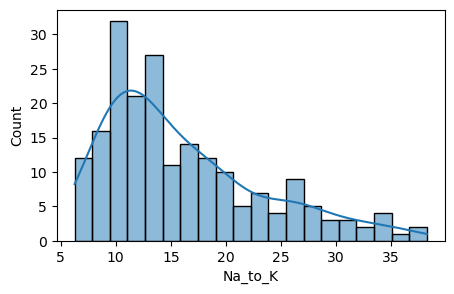

In [84]:
plt.figure(figsize=(5,3))
sns.histplot(x=df['Na_to_K'], bins=20,kde=True)
plt.show()

### SEX

In [85]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

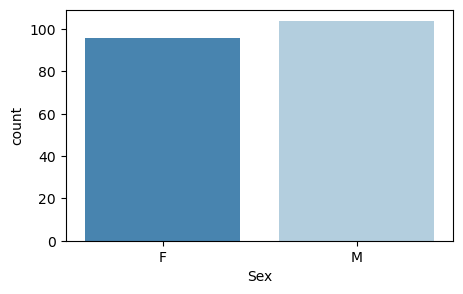

In [86]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['Sex'], palette='Blues_r')
plt.show()

Almost same size data between two category

### BP

In [87]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

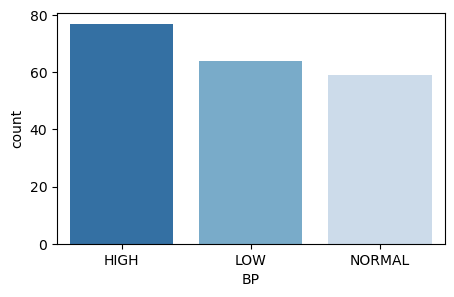

In [88]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['BP'], palette='Blues_r')
plt.show()

### Cholesterol

In [89]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

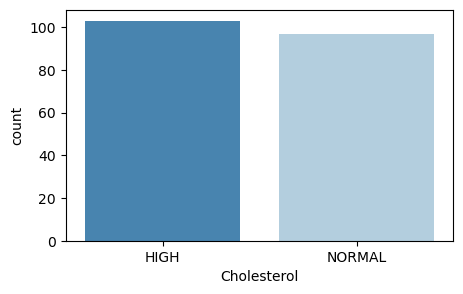

In [90]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['Cholesterol'], palette='Blues_r')
plt.show()

### Age - Drug

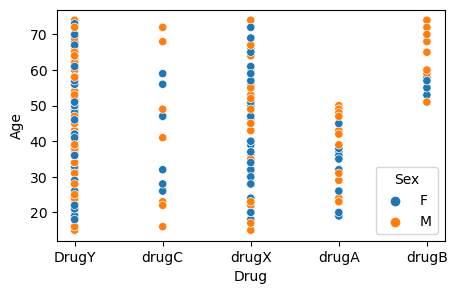

In [91]:
plt.figure(figsize=(5,3))
sns.scatterplot(y=df['Age'], x=df['Drug'], hue=df['Sex'])
plt.show()

1. drugB only limited to higher age group
2. drugA patient have lower age distribution.
3. Rest drug scattered over all age group (low to high)

### Na_to_K - Drug

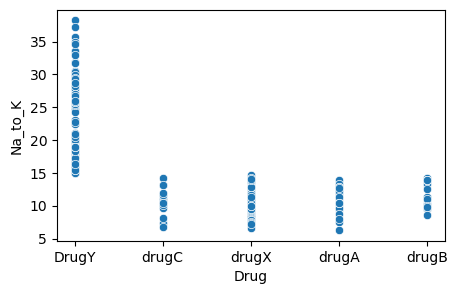

In [92]:
plt.figure(figsize=(5,3))
sns.scatterplot(y=df['Na_to_K'], x=df['Drug'])
plt.show()

1. DrugY user has Na_to_K high ratio.
2. Rest drug user ratio are limited between 5 to 15

### Sex - Drug

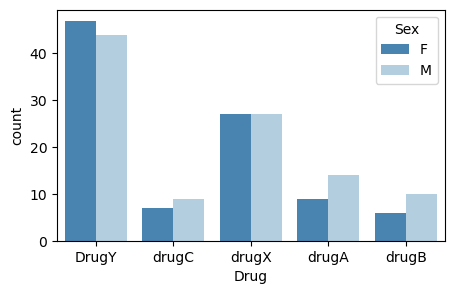

In [93]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['Drug'], palette='Blues_r', hue=df['Sex'])
plt.show()

### BP - Drug

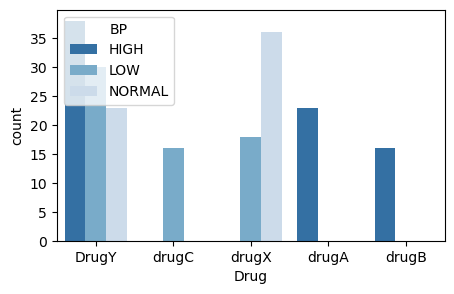

In [94]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['Drug'], palette='Blues_r', hue=df['BP'])
plt.show()

1. Different distribution for different drug for different BP
2. DrugA, drugB, DrugY taken by patient with higher BP

### Cholesterol - Drug

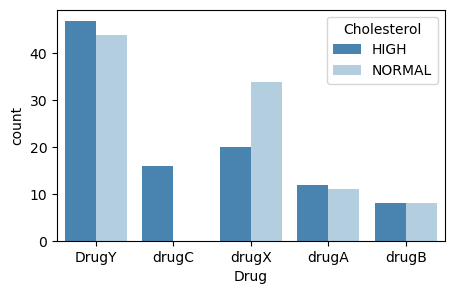

In [95]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['Drug'], palette='Blues_r', hue=df['Cholesterol'])
plt.show()

## FE

### Data binning

age and na_to_k

In [96]:

cut_labels = ['teenage', 'young adullt', 'mid-age adult', 'old']
cut_bins = [0, 18, 35, 55, df.Age.max()]

df['age_cat'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels)
df.drop('Age', axis=1, inplace= True)
df

,Sex,BP,Cholesterol,Na_to_K,Drug,age_cat
0,F,HIGH,HIGH,25.355,DrugY,young adullt
1,M,LOW,HIGH,13.093,drugC,mid-age adult
2,M,LOW,HIGH,10.114,drugC,mid-age adult
3,F,NORMAL,HIGH,7.798,drugX,young adullt
4,F,LOW,HIGH,18.043,DrugY,old
...,...,...,...,...,...,...
195,F,LOW,HIGH,11.567,drugC,old
196,M,LOW,HIGH,12.006,drugC,teenage
197,M,NORMAL,HIGH,9.894,drugX,mid-age adult
198,M,NORMAL,NORMAL,14.020,drugX,young adullt


In [97]:
cut_labels = ['Low','Normal','High']
df['Na_to_K_bin'] = pd.qcut(df.Na_to_K, q=3,labels=cut_labels)

df.drop('Na_to_K', axis=1, inplace= True)
df

,Sex,BP,Cholesterol,Drug,age_cat,Na_to_K_bin
0,F,HIGH,HIGH,DrugY,young adullt,High
1,M,LOW,HIGH,drugC,mid-age adult,Normal
2,M,LOW,HIGH,drugC,mid-age adult,Low
3,F,NORMAL,HIGH,drugX,young adullt,Low
4,F,LOW,HIGH,DrugY,old,High
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,old,Normal
196,M,LOW,HIGH,drugC,teenage,Normal
197,M,NORMAL,HIGH,drugX,mid-age adult,Low
198,M,NORMAL,NORMAL,drugX,young adullt,Normal


In [98]:
input_feature = df.drop(columns=['Drug'],axis=1)
target_feature = df['Drug']

In [99]:
input_feature

,Sex,BP,Cholesterol,age_cat,Na_to_K_bin
0,F,HIGH,HIGH,young adullt,High
1,M,LOW,HIGH,mid-age adult,Normal
2,M,LOW,HIGH,mid-age adult,Low
3,F,NORMAL,HIGH,young adullt,Low
4,F,LOW,HIGH,old,High
...,...,...,...,...,...
195,F,LOW,HIGH,old,Normal
196,M,LOW,HIGH,teenage,Normal
197,M,NORMAL,HIGH,mid-age adult,Low
198,M,NORMAL,NORMAL,young adullt,Normal


### OneHotEncoding

In [100]:
input_feature = pd.get_dummies(input_feature)
input_feature

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,age_cat_teenage,age_cat_young adullt,age_cat_mid-age adult,age_cat_old,Na_to_K_bin_Low,Na_to_K_bin_Normal,Na_to_K_bin_High
0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
2,0,1,0,1,0,1,0,0,0,1,0,1,0,0
3,1,0,0,0,1,1,0,0,1,0,0,1,0,0
4,1,0,0,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,1,0,1,0,0,0,0,1,0,1,0
196,0,1,0,1,0,1,0,1,0,0,0,0,1,0
197,0,1,0,0,1,1,0,0,0,1,0,1,0,0
198,0,1,0,0,1,0,1,0,1,0,0,0,1,0


## Applying Model

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_feature,target_feature,test_size=0.2)

In [103]:
from sklearn.ensemble import RandomForestClassifier
 
 # create regressor object
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

## Analysing Model Performance
1. Presicion
2. Recall
3. Accuracy

In [112]:
from sklearn import metrics
y_pred = model.predict(x_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       0.64      0.94      0.76        17
       drugA       1.00      0.33      0.50         3
       drugB       0.67      0.67      0.67         3
       drugC       1.00      0.33      0.50         3
       drugX       1.00      0.71      0.83        14

    accuracy                           0.75        40
   macro avg       0.86      0.60      0.65        40
weighted avg       0.82      0.75      0.74        40



In [110]:
model.score(x_test, y_test)

0.75